In [6]:
import tensorflow.keras
import pandas as pd
import sklearn as sk
import numpy as np 
import ktrain
from ktrain import text

from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc 
from pylab import rcParams 
%matplotlib inline 
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

In [34]:
!pip install tensorflow-cpu==2.1.0

     |████████████████████████████████| 120.8 MB 312 kB/s eta 0:00:01
Processing /Users/justin/Library/Caches/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6/wrapt-1.12.1-cp37-cp37m-macosx_10_9_x86_64.whl
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.10.11
ERROR: Cannot uninstall 'wrapt'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [7]:
df = pd.read_json('tweetsdata.json')

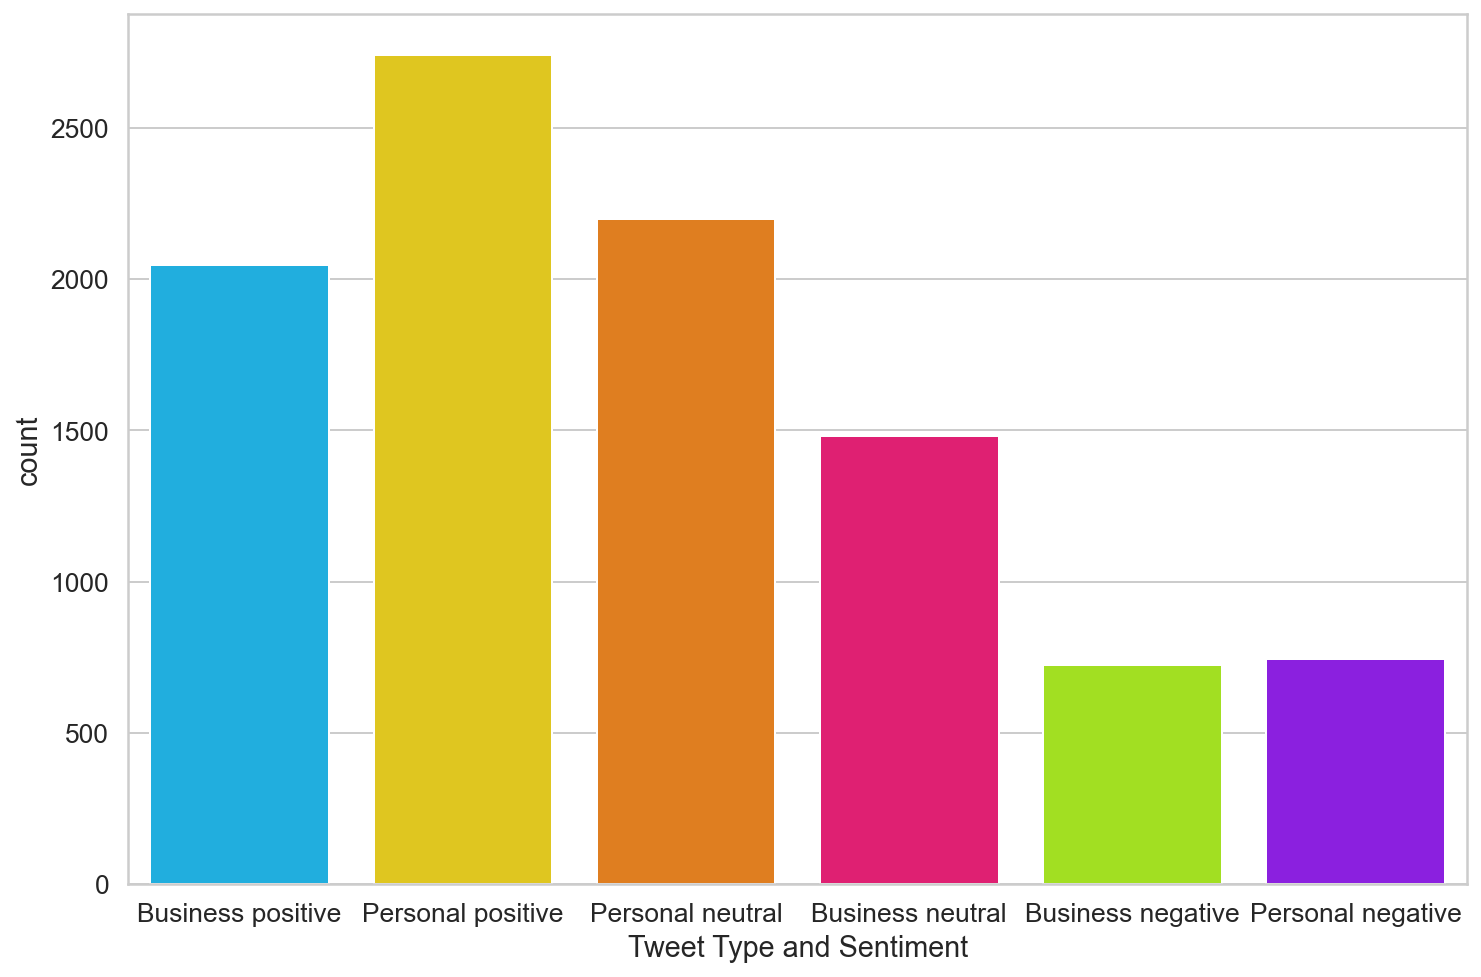

In [8]:
ax = sns.countplot(df.tweetType)
plt.xlabel('Tweet Type and Sentiment');

In [ ]:
###What is distilBERt###
#Distilbert is a small, fast, cheap and light Transformer model trained by distilling BERT base.  It has 40 percent less parameters than bert-base-uncased, runs 60 percent
#faster while preserving over 95 percent of Bert's performances as measured on the GLUE language understanding benchmark

#https://gluebenchmark.com/leaderboard
#110 million parameters vs 66 million parameters 



In [9]:
from transformers import DistilBertModel, DistilBertTokenizer

PRE_TRAINED_MODEL_NAME = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [10]:
token_lens = []

for txt in df.tweet:
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))

In [11]:
sample_txt = 'North American Supercharger usage is now at pre-covid high, Europe about a week behind, China & Asia-Pacific in general doing great'

In [12]:
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: North American Supercharger usage is now at pre-covid high, Europe about a week behind, China & Asia-Pacific in general doing great
   Tokens: ['north', 'american', 'super', '##cha', '##rger', 'usage', 'is', 'now', 'at', 'pre', '-', 'co', '##vid', 'high', ',', 'europe', 'about', 'a', 'week', 'behind', ',', 'china', '&', 'asia', '-', 'pacific', 'in', 'general', 'doing', 'great']
Token IDs: [2167, 2137, 3565, 7507, 25858, 8192, 2003, 2085, 2012, 3653, 1011, 2522, 17258, 2152, 1010, 2885, 2055, 1037, 2733, 2369, 1010, 2859, 1004, 4021, 1011, 3534, 1999, 2236, 2725, 2307]


In [13]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=512,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)

encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

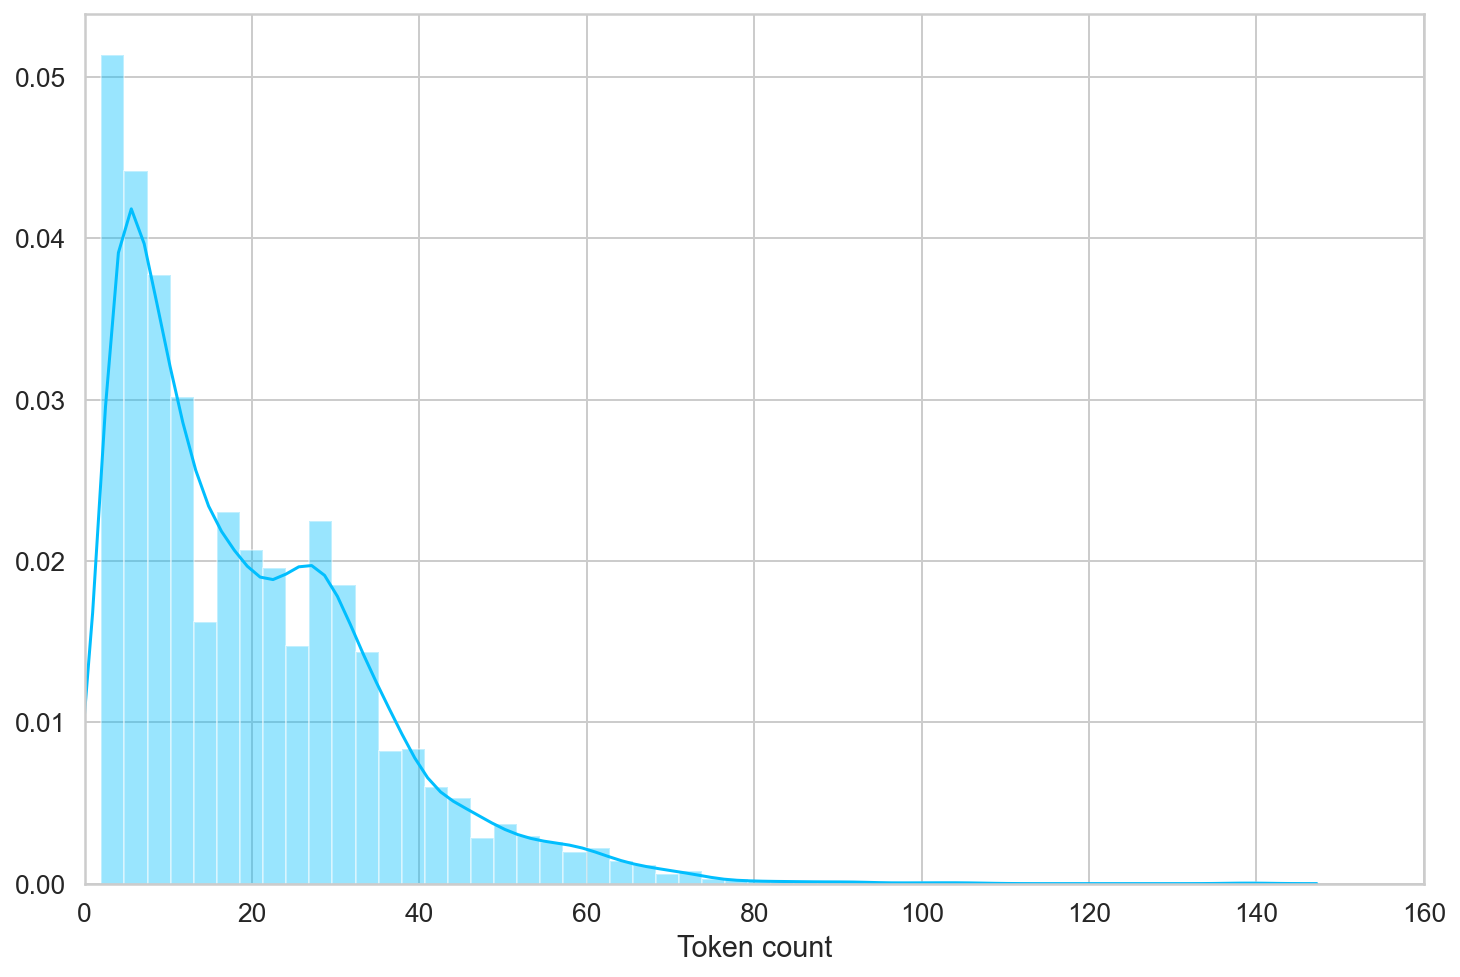

In [14]:
sns.distplot(token_lens)
plt.xlim([0, 160]);
plt.xlabel('Token count');

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['tweetType'],
                                                    test_size = 0.2,
                                                    random_state = 777)

In [16]:
data_train = pd.DataFrame({'tweet' : X_train, 'tweetType' : y_train})
data_test = pd.DataFrame({'tweet': X_test, 'tweetType' : y_test})

In [17]:
#extended tweet max words is 300 so maybe elon might tweet a lot one day
(train, val, preproc) = text.texts_from_df(train_df= data_train, val_df = data_test,
                   text_column = 'tweet',
                   label_columns = 'tweetType',
                   maxlen = 80,
                   preprocess_mode = 'distilbert') 

preprocessing train...
language: en
train sequence lengths:
	mean : 12
	95percentile : 33
	99percentile : 45


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 13
	95percentile : 34
	99percentile : 46


In [18]:
model = text.text_classifier(name = 'distilbert', train_data = train, preproc = preproc)

Is Multi-Label? False
maxlen is 80
done.


In [19]:
learner = ktrain.get_learner(model = model,
                             train_data = train,
                             val_data = val,
                             batch_size = 6)

simulating training for different learning rates... this may take a few moments...
Train for 1324 steps
Epoch 1/1024
1324/1324 [==============================] - 88s 66ms/step - loss: 1.6060 - accuracy: 0.33453s - loss: 1.6003 -  - ETA: 3s - loss: 1.6011 - 
Epoch 2/1024
 528/1324 [==========>...................] - ETA: 49s - loss: 2.1671 - accuracy: 0.2327  ETA: 1:02 - lo - ETA: 59s - los

done.
Visually inspect loss plot and select learning rate associated with falling loss


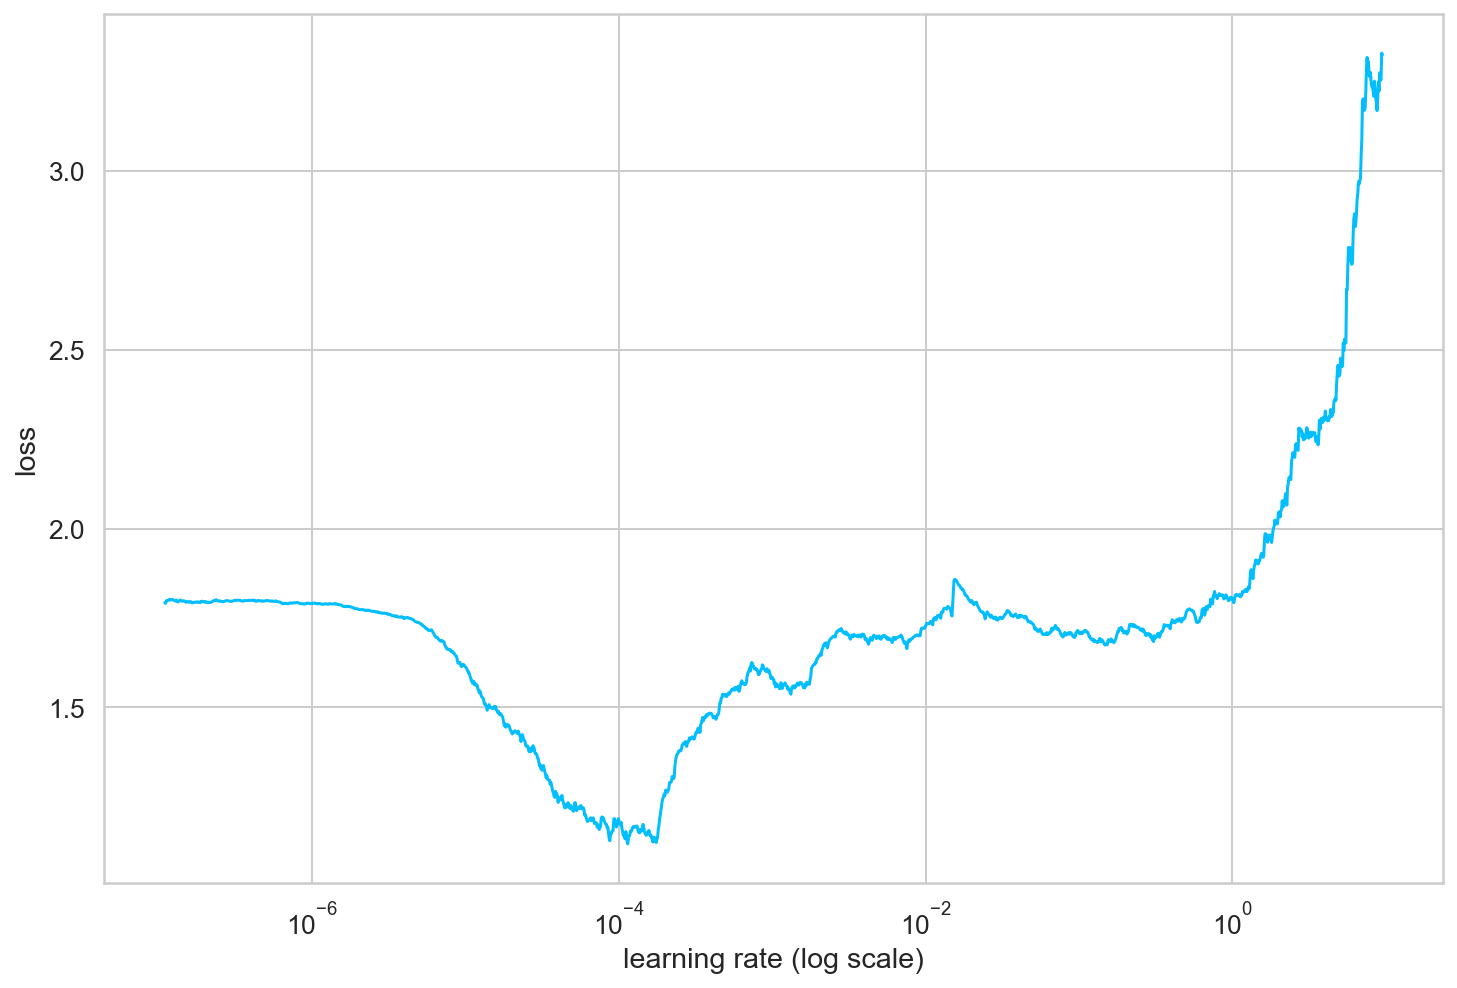

In [68]:
#learner.lr_find(show_plot = True)

In [20]:
learner.autofit(lr = 0.0001, epochs = 5)



begin training using triangular learning rate policy with max lr of 0.0001...
Train for 1325 steps, validate for 63 steps
Epoch 1/5
1325/1325 [==============================] - 1428s 1s/step - loss: 0.9382 - accuracy: 0.6651 - val_loss: 0.6219 - val_accuracy: 0.7897
Epoch 2/5
1325/1325 [==============================] - 1378s 1s/step - loss: 0.5437 - accuracy: 0.8161 - val_loss: 0.5798 - val_accuracy: 0.7968
Epoch 3/5
1325/1325 [==============================] - 1285s 970ms/step - loss: 0.3893 - accuracy: 0.8726 - val_loss: 0.5895 - val_accuracy: 0.8058
Epoch 4/5
1325/1325 [==============================] - 1281s 967ms/step - loss: 0.2953 - accuracy: 0.9064 - val_loss: 0.6593 - val_accuracy: 0.8048
Epoch 5/5
1325/1325 [==============================] - 1286s 971ms/step - loss: 0.2394 - accuracy: 0.9238 - val_loss: 0.7696 - val_accuracy: 0.7988


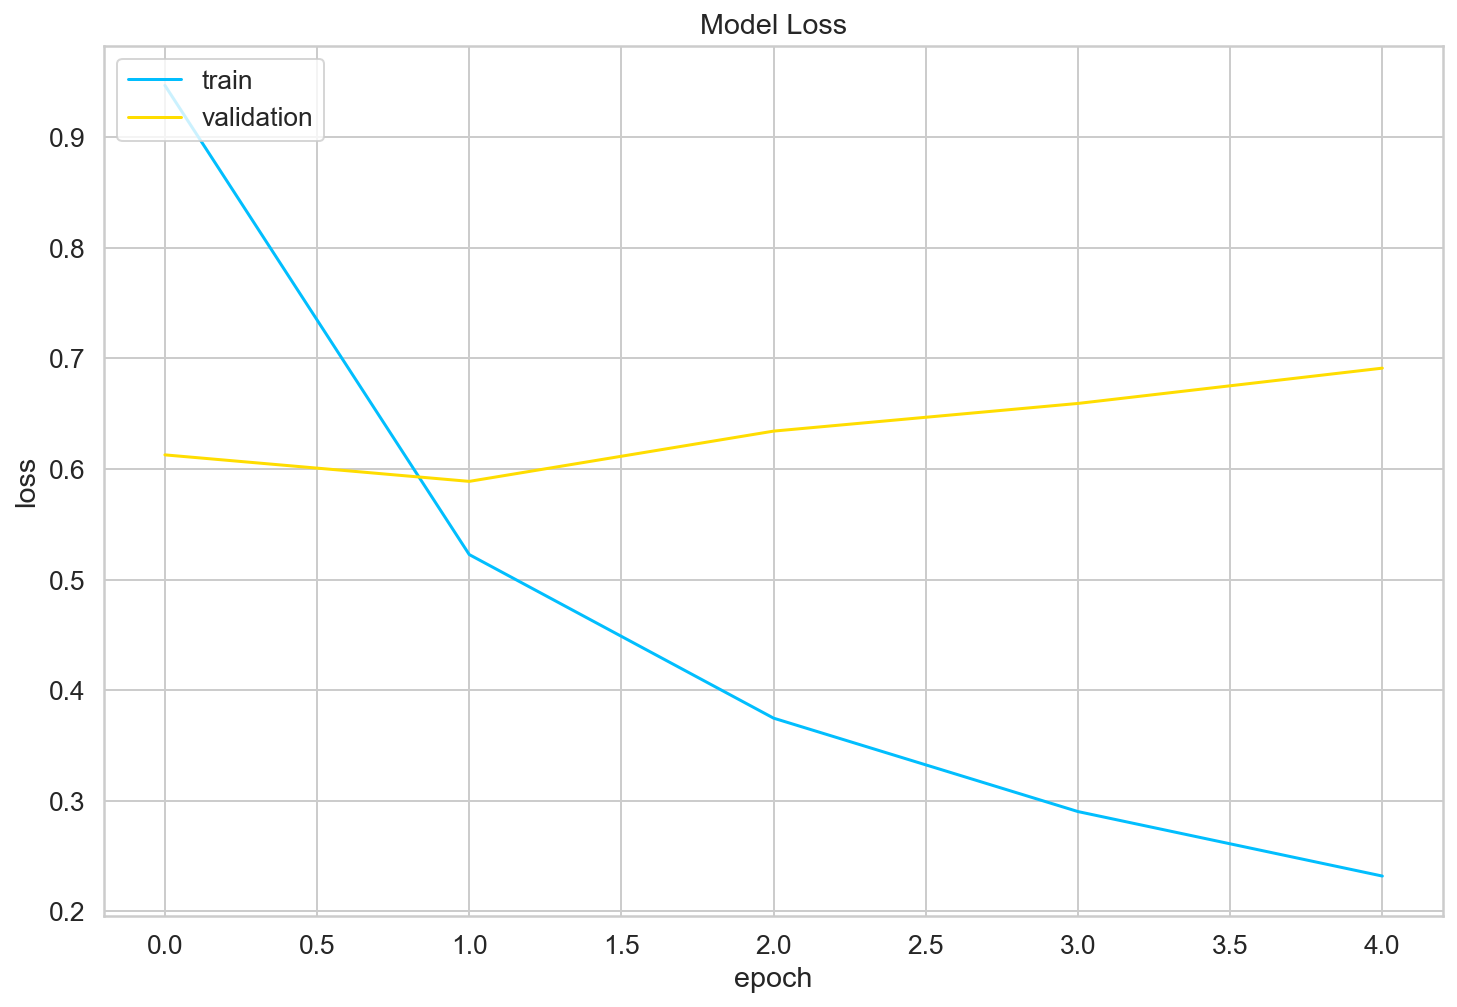

In [70]:
#learner.plot('loss')

In [21]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [22]:
y_pred = X_test.apply(lambda x: predictor.predict(x));

In [23]:
from sklearn.metrics import confusion_matrix, classification_report 

In [24]:
class_names = ['Business negative', 'Business neutral', 'Business positive', 
               'Personal negative', 'Personal neutral', 'Personal positive']

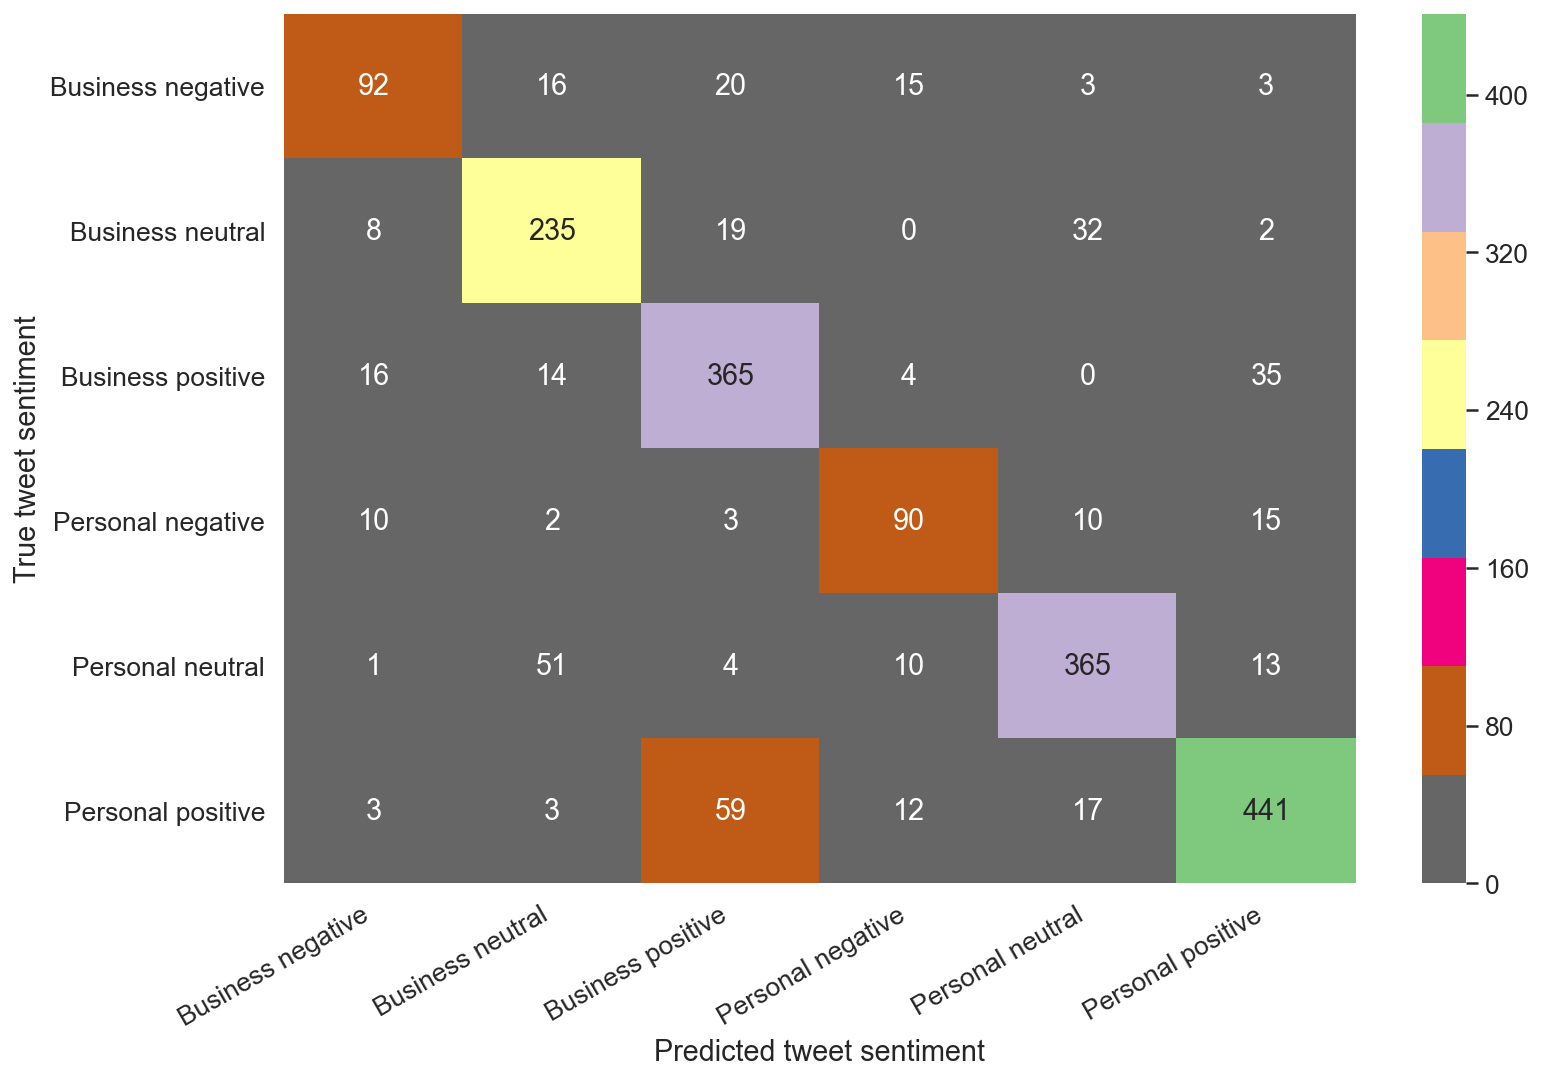

In [25]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Accent_r")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True tweet sentiment')
    plt.xlabel('Predicted tweet sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [26]:
print(classification_report(y_test, y_pred, labels=class_names))

                   precision    recall  f1-score   support

Business negative       0.71      0.62      0.66       149
 Business neutral       0.73      0.79      0.76       296
Business positive       0.78      0.84      0.81       434
Personal negative       0.69      0.69      0.69       130
 Personal neutral       0.85      0.82      0.84       444
Personal positive       0.87      0.82      0.84       535

         accuracy                           0.80      1988
        macro avg       0.77      0.77      0.77      1988
     weighted avg       0.80      0.80      0.80      1988



In [27]:
#June 29th tweets
#https://twitter.com/elonmusk/with_replies
data = ['Btw, Tesla actually receives *least* subsidies of any automaker in US. Federal tax credit applies to other automaker EVs, but no longer Tesla.',
        'Great Model Y review by @jayleno',
        'Cybertruck inside Petersen Automotive Museum. #tesla #Cybertruck',
        '69 days after 4/20 again haha',
        'There are a ridiculous number of false positive C19 tests, in some cases ~50%. False positives scale linearly with # of tests. This is a big part of why C19 positive tests are going up while hospitalizations & mortality are declining. Anyone who tests positive should retest.',
        'Cybertruck does feel like cgi irl'] 

In [28]:
predictor.predict(data)

['Business positive',
 'Business positive',
 'Business neutral',
 'Business positive',
 'Personal positive',
 'Business positive']

In [29]:
predictor.save('elonDistilBERT80')

In [30]:
reloaded_predictor = ktrain.load_predictor('elonDistilBERT80')

In [31]:
reloaded_predictor.get_classes()

['Business negative',
 'Business neutral',
 'Business positive',
 'Personal negative',
 'Personal neutral',
 'Personal positive']

In [32]:
data2 = ['Congrats Tesla Team — U ROK!!',
        'Happy 4th of July!!',
        'Please take a moment to report accounts clearly engaged in harassment. It is the only way to maintain public discourse.',
        'Side note: Chomsky sucks',
        'North American Supercharger usage is now at pre-covid high, Europe about a week behind, China & Asia-Pacific in general doing great',
        'Beautiful fireworks in LA tonight',
        'Limited edition short shorts now available at',
        'Only $69.420!!',
        'Dang, we broke the website',
        'Read The Story of Civilization by Will & Ariel Durant']

In [33]:
reloaded_predictor.predict(data2)

['Business positive',
 'Business positive',
 'Business negative',
 'Personal negative',
 'Business positive',
 'Personal positive',
 'Personal negative',
 'Business neutral',
 'Personal neutral',
 'Personal neutral']